In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [5]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                18
price_per_sqft       18
area                 18
areaWithType          0
bedRoom               0
bathroom              0
balcony               0
additionalRoom        0
floorNum             19
facing             1105
agePossession         1
nearbyLocations     177
furnishDetails      981
features            635
dtype: int64

In [6]:
df.duplicated().sum()

122

In [7]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 



,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,ramprasta awho,sector 95,0.92,5257.0,1750.0,Built Up area: 1750 (162.58 sq.m.)Carpet area:...,3,3,3+,not available,13.0,North-East,undefined,NaN,NaN,NaN


In [13]:
#areaWithType
import re

# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [14]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [15]:


# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value



In [16]:


# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)



In [18]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3114,2.17,flat,1550.0,Carpet area: 1549 (143.91 sq.m.),NaN,NaN,1549.0
3791,1.60,flat,2545.0,Super Built up area 2545(236.44 sq.m.),2545.0,NaN,NaN
3393,1.25,flat,1744.0,Super Built up area 1744(162.02 sq.m.),1744.0,NaN,NaN
759,1.60,flat,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,1950.0,NaN,1161.0
1222,0.95,flat,1385.0,Super Built up area 1385(128.67 sq.m.)Built Up...,1385.0,940.0,845.0


In [19]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [20]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,0.42,house,50.0,Plot area 50(4.65 sq.m.),NaN,NaN,NaN
3,6.50,house,1836.0,Plot area 215(179.77 sq.m.)Built Up area: 215 ...,NaN,215.0,NaN
15,8.50,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,NaN,NaN
16,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN
18,2.40,house,2000.0,Plot area 2000(185.81 sq.m.),NaN,NaN,NaN


In [21]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [22]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [23]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [24]:


# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None



In [25]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [26]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,0.42,house,50.0,Plot area 50(4.65 sq.m.),NaN,50.0,NaN
15,8.50,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,4000.0,NaN
16,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.0,NaN
18,2.40,house,2000.0,Plot area 2000(185.81 sq.m.),NaN,2000.0,NaN
29,3.00,house,558.0,Plot area 62(51.84 sq.m.),NaN,62.0,NaN
...,...,...,...,...,...,...,...
3768,2.90,house,2500.0,Plot area 2500(232.26 sq.m.),NaN,2500.0,NaN
3771,0.80,house,100.0,Plot area 100(9.29 sq.m.),NaN,100.0,NaN
3774,8.40,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,4000.0,NaN
3781,4.70,house,2160.0,Plot area 240(200.67 sq.m.),NaN,240.0,NaN


In [27]:


def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']



In [28]:


all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)



In [29]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,0.42,house,50.0,Plot area 50(4.65 sq.m.),NaN,50.0,NaN
15,8.50,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,4000.0,NaN
16,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,2844.0,NaN
18,2.40,house,2000.0,Plot area 2000(185.81 sq.m.),NaN,2000.0,NaN
29,3.00,house,558.0,Plot area 62(51.84 sq.m.),NaN,558.0,NaN
...,...,...,...,...,...,...,...
3768,2.90,house,2500.0,Plot area 2500(232.26 sq.m.),NaN,2500.0,NaN
3771,0.80,house,100.0,Plot area 100(9.29 sq.m.),NaN,100.0,NaN
3774,8.40,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,4000.0,NaN
3781,4.70,house,2160.0,Plot area 240(200.67 sq.m.),NaN,2160.0,NaN


In [30]:
# update the original dataframe
df.update(all_nan_df)

In [31]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,ramprasta awho,sector 95,0.92,5257.0,1750.0,Built Up area: 1750 (162.58 sq.m.)Carpet area:...,3,3,3+,not available,13.0,North-East,undefined,NaN,NaN,NaN,NaN,1750.0,1600.0
1,flat,bestech park view grand spa,sector 81,2.20,8270.0,2660.0,Super Built up area 2660(247.12 sq.m.)Carpet a...,3,4,3+,servant room,8.0,East,1 to 5 Year Old,"['Sapphire 83 Mall', 'NH-8, IMT Manesar', 'Dwa...","['4 Wardrobe', '1 Water Purifier', '4 Fan', '1...","['Water purifier', 'Security / Fire Alarm', 'P...",2660.0,NaN,2300.0
2,house,ss omnia,sector 86,0.42,84000.0,50.0,Plot area 50(4.65 sq.m.),5,3,2,not available,3.0,NaN,1 to 5 Year Old,"['Orris Community Center', 'Essar Petrol Pump'...",[],NaN,NaN,50.0,NaN
3,house,independent,sector 43,6.50,35400.0,1836.0,Plot area 215(179.77 sq.m.)Built Up area: 215 ...,5,4,3+,"pooja room,servant room",3.0,South-East,5 to 10 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","['10 Fan', '5 Geyser', '26 Light', '5 AC', '1 ...","['High Ceiling Height', 'False Ceiling Lightin...",NaN,215.0,NaN
4,flat,vasant appartments,sector 14,1.70,7391.0,2300.0,Carpet area: 2300 (213.68 sq.m.),5,5,2,"pooja room,study room,store room",2.0,North-West,10+ Year Old,"['Sheetla Mata Mandir', 'Hanuman Mandir', 'Hsb...","['1 Water Purifier', '10 Fan', '1 Exhaust Fan'...","['Security / Fire Alarm', 'Intercom Facility',...",NaN,NaN,2300.0


In [32]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [33]:
#additionalRoom

df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
                                                 ... 
study room,others,servant room                      1
store room,servant room,study room,pooja room       1
servant room,store room,study room,pooja room       1
servant room,study room,others                      1
store room,study room                               1
Name: count, Length: 65, dtype: int64

In [34]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [35]:


df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]



,additionalRoom,study room,servant room,store room,pooja room,others
1721,"store room,servant room",0,1,1,0,0
1532,others,0,0,0,0,1
662,not available,0,0,0,0,0
2665,study room,1,0,0,0,0
1606,not available,0,0,0,0,0


In [37]:
#agePossession

df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Dec 2025                 7
Aug 2023                 7
Jun 2024                 7
Nov 2023                 5
Oct 2023                 4
Aug 2024                 4
Sep 2023                 4
Jul 2024                 4
By 2025                  4
May 2024                 3
Jan 2025                 3
Feb 2024                 3
Nov 2024                 3
Sep 2025                 2
Oct 2025                 2
By 2027                  2
Jun 2027                 2
Jul 2025                 2
Mar 2025                 2
Apr 2026                 2
Jul 2027                 2
Aug 2025      

In [38]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [39]:


df['agePossession'] = df['agePossession'].apply(categorize_age_possession)



In [40]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
3289,flat,siddhartha apartment,sector 95,1.10,4327.0,2542.0,Carpet area: 2542 (236.16 sq.m.),4,3,3,...,NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",NaN,NaN,2542.0,0,1,0,0,1
3612,flat,emaar imperial gardens,sector 102,1.98,9900.0,2000.0,Carpet area: 2000 (185.81 sq.m.),3,3,3+,...,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Intercom Fac...",NaN,NaN,2000.0,0,1,0,0,0
2129,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,...,NaN,"['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,1622.0,NaN,1,1,1,1,0
893,flat,the close north,sector 50,2.35,11767.0,1997.0,Super Built up area 1997(185.53 sq.m.)Built Up...,3,3,3+,...,"['5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stov...","['Centrally Air Conditioned', 'Water purifier'...",1997.0,1950.0,1850.0,0,0,0,0,0
2817,flat,signature the roselia,sector 95,0.41,7293.0,562.0,Built Up area: 670 (62.25 sq.m.)Carpet area: 5...,2,2,2,...,"['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '1 St...","['Security / Fire Alarm', 'Lift(s)', 'High Cei...",NaN,670.0,569.0,0,0,0,0,0


In [41]:
# furnishDetails
df['furnishDetails']


0                                                     NaN
1       ['4 Wardrobe', '1 Water Purifier', '4 Fan', '1...
2                                                      []
3       ['10 Fan', '5 Geyser', '26 Light', '5 AC', '1 ...
4       ['1 Water Purifier', '10 Fan', '1 Exhaust Fan'...
                              ...                        
3798    ['4 Light', '1 Modular Kitchen', 'No AC', 'No ...
3799    ['3 Fan', '1 Exhaust Fan', '5 Light', '4 AC', ...
3800    ['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...
3801    ['4 AC', 'No Bed', 'No Chimney', 'No Curtains'...
3802    ['2 Fan', '2 Light', '1 Chimney', '2 Wardrobe'...
Name: furnishDetails, Length: 3803, dtype: object

In [42]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cnuna\AppData\Local\Temp\ipykernel_3240\2445438592.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [43]:


furnishings_df.shape



(3803, 19)

In [44]:


furnishings_df.drop(columns=['furnishDetails'],inplace=True)



C:\Users\cnuna\AppData\Local\Temp\ipykernel_3240\207935771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [45]:


import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [46]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [47]:


wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)



c:\Users\cnuna\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\cnuna\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\cnuna\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\cnuna\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\cnuna\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

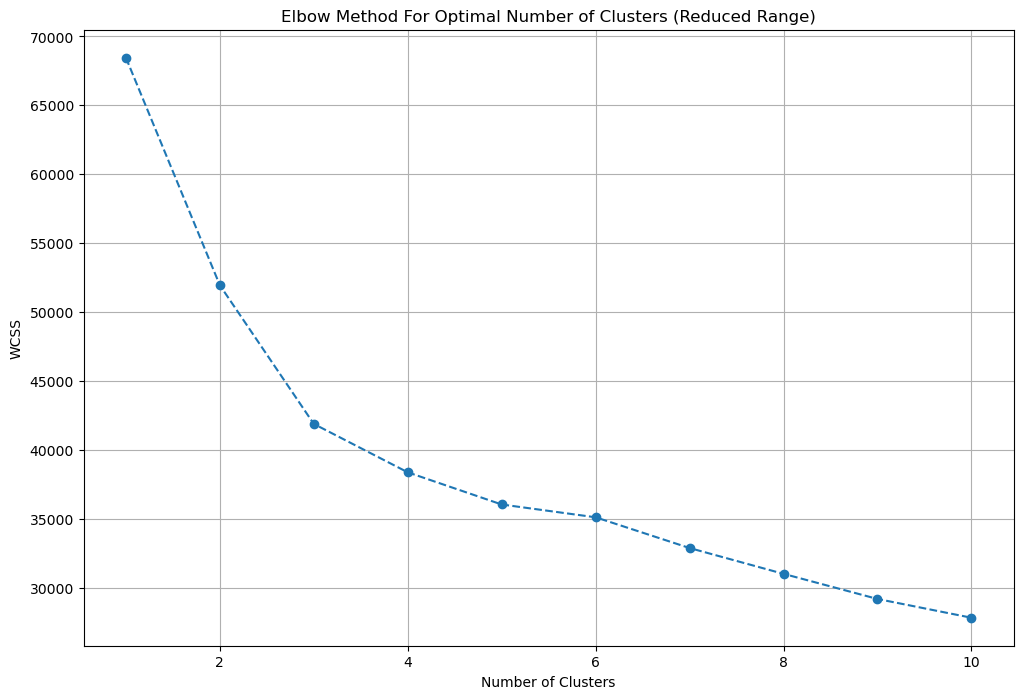

In [48]:


# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()



In [49]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [50]:


df = df.iloc[:,:-18]



In [51]:


df['furnishing_type'] = cluster_assignments



In [52]:


df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished



,furnishDetails,furnishing_type
2346,"['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '1 Ge...",2
2093,"['5 Geyser', '8 AC', 'No Bed', 'No Chimney', '...",0
266,[],0
2789,"['2 Wardrobe', '1 Water Purifier', '5 Fan', '1...",2
1410,"['4 Fan', '5 Light', '4 AC', 'No Bed', 'No Chi...",0


In [53]:
# features
df[['society','features']].sample(5)


,society,features
648,adani m2k oyster grande,"['Power Back-up', 'Intercom Facility', 'Lift(s..."
2954,dlf new town heights,"['Feng Shui / Vaastu Compliant', 'Security / F..."
1730,bestech park view residency,"['Security / Fire Alarm', 'Lift(s)', 'Maintena..."
1847,huda plot sector 38,"['Piped-gas', 'Internet/wi-fi connectivity']"
1980,palam vihar society,"['Centrally Air Conditioned', 'Lift(s)', 'Park..."


In [54]:


df['features'].isnull().sum()



635

In [57]:
import pandas as pd
app_df = pd.read_csv("D:\\Real Estate House Price Prediction\\datasets\\appartments.csv")
app_df.head(2)



,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."


In [58]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [59]:
temp_df = df[df['features'].isnull()]

In [60]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [61]:


df.loc[temp_df.index,'features'] = x.values



In [62]:
df['features'].isnull().sum()

481

In [63]:


from sklearn.preprocessing import MultiLabelBinarizer
import ast



In [64]:


# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)



In [65]:


features_binary_df.sample(5)



,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,...,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
665,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:


wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)



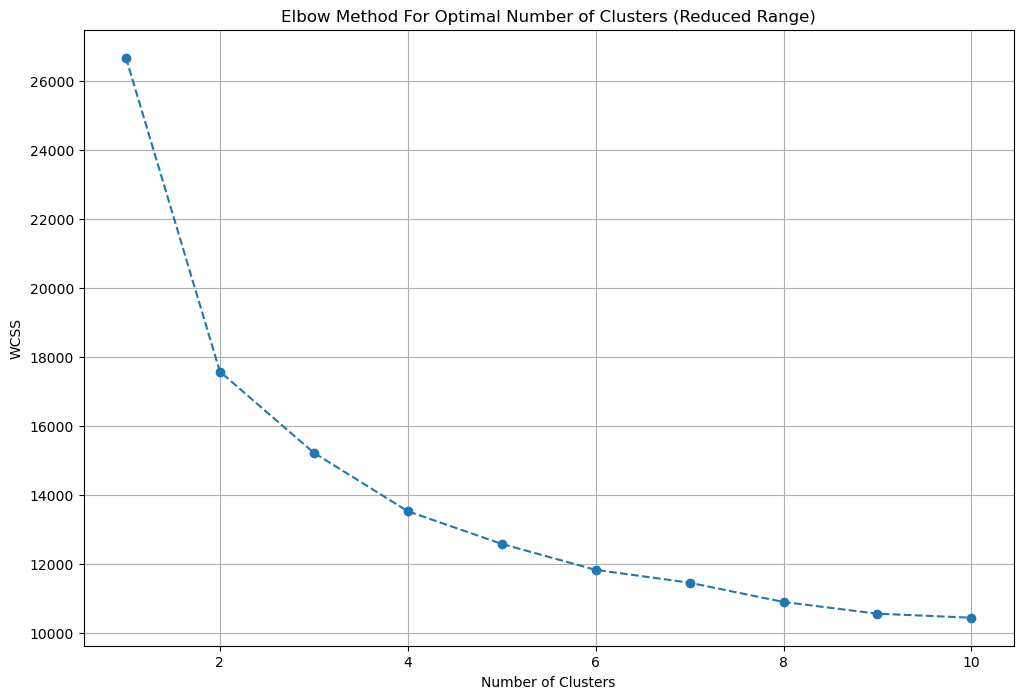

In [67]:


# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()



In [68]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [69]:


df['luxury_score'] = luxury_score



In [70]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [71]:
df.head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ramprasta awho,sector 95,0.92,5257.0,1750.0,Built Up area: 1750 (162.58 sq.m.)Carpet area:...,3,3,3+,...,NaN,1750.0,1600.0,0,0,0,0,0,0,0
1,flat,bestech park view grand spa,sector 81,2.20,8270.0,2660.0,Super Built up area 2660(247.12 sq.m.)Carpet a...,3,4,3+,...,2660.0,NaN,2300.0,0,1,0,0,0,2,165
2,house,ss omnia,sector 86,0.42,84000.0,50.0,Plot area 50(4.65 sq.m.),5,3,2,...,NaN,50.0,NaN,0,0,0,0,0,0,0
3,house,independent,sector 43,6.50,35400.0,1836.0,Plot area 215(179.77 sq.m.)Built Up area: 215 ...,5,4,3+,...,NaN,215.0,NaN,0,1,0,1,0,2,54
4,flat,vasant appartments,sector 14,1.70,7391.0,2300.0,Carpet area: 2300 (213.68 sq.m.),5,5,2,...,NaN,NaN,2300.0,1,0,1,1,0,1,71


In [72]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)